In [8]:
%matplotlib inline

import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger()

b = phoebe.default_binary()
b['q'] = 0.8
b['ecc'] = 0.1
b['irrad_method'] = 'none'

In [13]:
b.add_dataset('orb', times=np.linspace(0,4,1000), component=['primary', 'secondary'])

times, fluxes, sigmas = np.loadtxt('test.lc.in', unpack=True)

b.add_dataset('lc', times=times, fluxes=fluxes, sigmas=sigmas, dataset='lc01')


<ParameterSet: 15 parameters | contexts: compute, dataset>

In [14]:
b.set_value('incl@orbit', 90)
b.run_compute(model='run_with_incl_90')

b.set_value('incl@orbit', 85)
b.run_compute(model='run_with_incl_85')

b.set_value('incl@orbit', 80)
b.run_compute(model='run_with_incl_80')

<ParameterSet: 30 parameters | kinds: orb, lc>

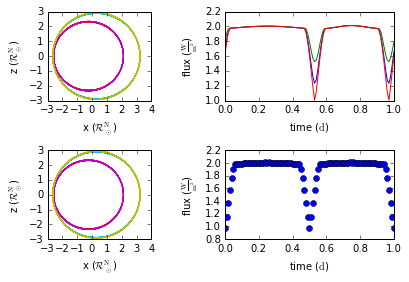

In [15]:
axs, artists = b.plot()

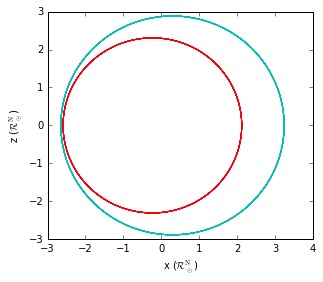

In [18]:
axs, artists = b['orb@run_with_incl_80'].plot()

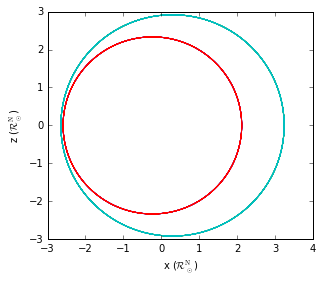

In [17]:
axs, artists = b['orb@run_with_incl_85'].plot()

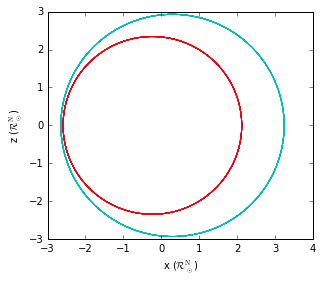

In [19]:
axs, artists = b['orb@run_with_incl_90'].plot()

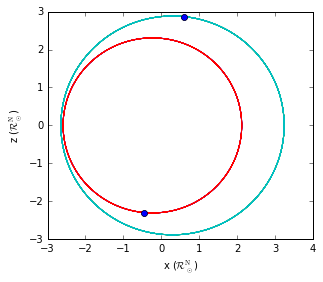

In [20]:
axs, artists = b['orb@run_with_incl_80'].plot(time=1.0)

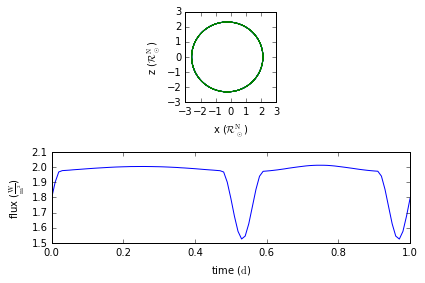

In [30]:
axs, artists = b['run_with_incl_80'].plot('primary@orb', 'lc01')

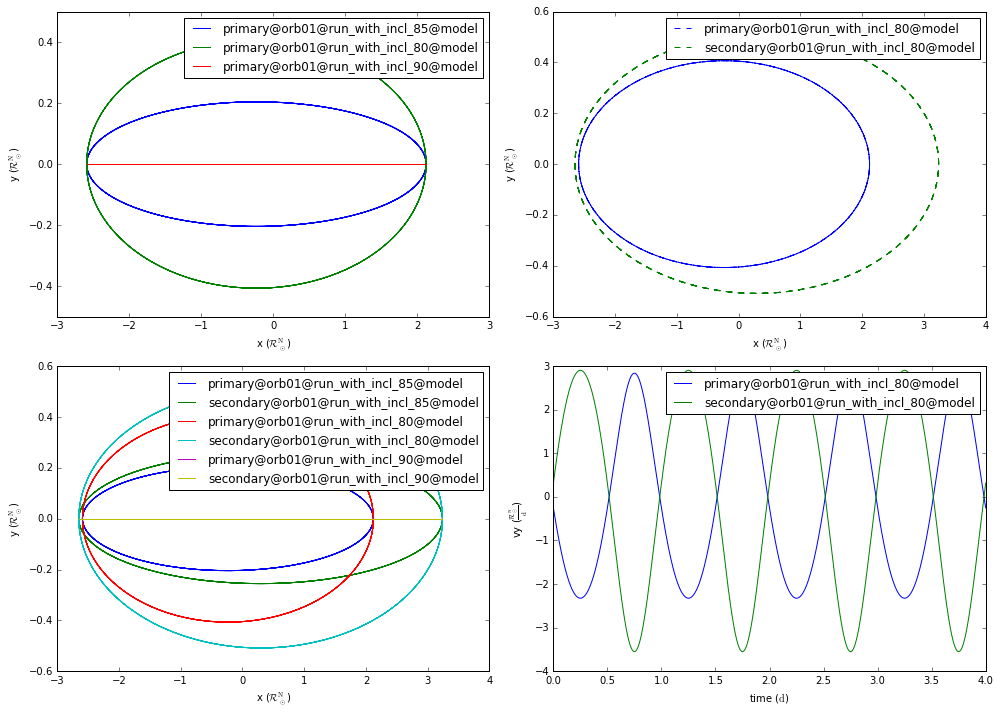

In [46]:
fig = plt.figure(figsize=(14,10))
ax = [fig.add_subplot(2,2,i+1) for i in range(4)]

axs, artists = b.plot('orb01@primary', y='ys', ax=ax[0])
ax[0].legend()

axs, artists = b['orb01@run_with_incl_80'].plot(y='ys', linestyle='--', time=5, uncover=True, ax=ax[1])
ax[1].legend()

axs, artists = b.plot(dataset='orb01', y='ys', ax=ax[2])
ax[2].legend()

axs, artists = b.plot(dataset='orb01', model='run_with_incl_80', x='times', y='vys', time=5, uncover=True, ax=ax[3])
ax[3].legend()



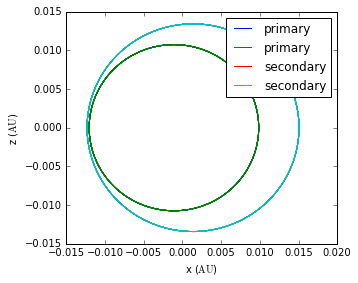

In [49]:
axs, artists = b['primary@orb@run_with_incl_80'].plot(label='primary',xunit='AU', yunit='AU')
axs, artists = b['secondary@orb@run_with_incl_80'].plot(label='secondary', xunit='AU', yunit='AU')
legend = axs[0].legend()


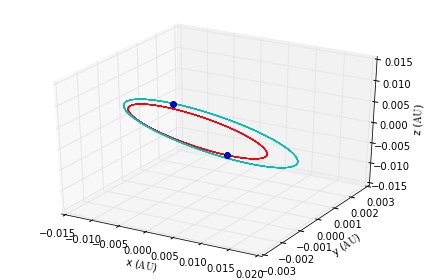

In [50]:
figure = plt.figure()
ax = figure.add_subplot(111, projection='3d')

axes, artists = b['orb@run_with_incl_80'].plot(time=0, facecolor='teffs', edgecolor=None, ax=ax, xunit='AU', yunit='AU', zunit = 'AU')
legend = axs[0].legend()

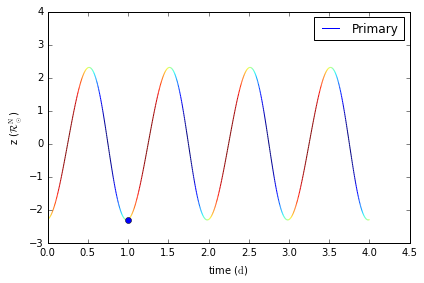

In [58]:
axs, artists = b['orb01@primary@run_with_incl_80'].plot(time=1.0, x='times', color='vzs', label = 'Primary', ylim = (-3,4))
legend = axs[0].legend()

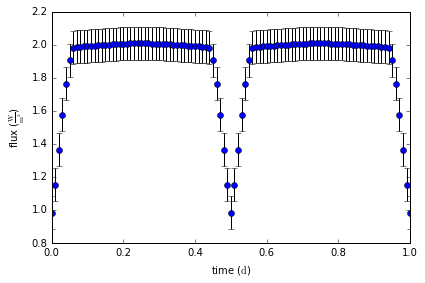

In [59]:
axs, artists = b['lc01@dataset'].plot(yerrors='sigmas', color = 'blue')